In [7]:
import numpy as np
import pandas
from matplotlib import pyplot as plt, cm as colormap

In [3]:
### Constants
AIR_DENSITY     = 1.225         * 1e0   # kg/m**3
AIR_VISCOSITY   = 1.7894e-5     * 1e0   # kg/m/s  or Pa*s (Dynamic)


In [4]:
### Config
MEAN_CHORD      = 200           * 1e-3  # mm
WINGSPAN        = 1200          * 1e-3  # mm


In [51]:
alpha,reynolds,cl,cd,cm = np.load("tkv2008_analysis_3_smooth.npy",allow_pickle=True)

In [23]:
velocity = AIR_VISCOSITY * reynolds / AIR_DENSITY / MEAN_CHORD

In [ ]:
l = AIR_DENSITY * velocity**2 * MEAN_CHORD      * WINGSPAN * CL / 2
d = AIR_DENSITY * velocity**2 * MEAN_CHORD      * WINGSPAN * CD / 2
m = AIR_DENSITY * velocity**2 * MEAN_CHORD**2   * WINGSPAN * CM / 2

Check variations in air viscosity and density
array reynolds x alpha


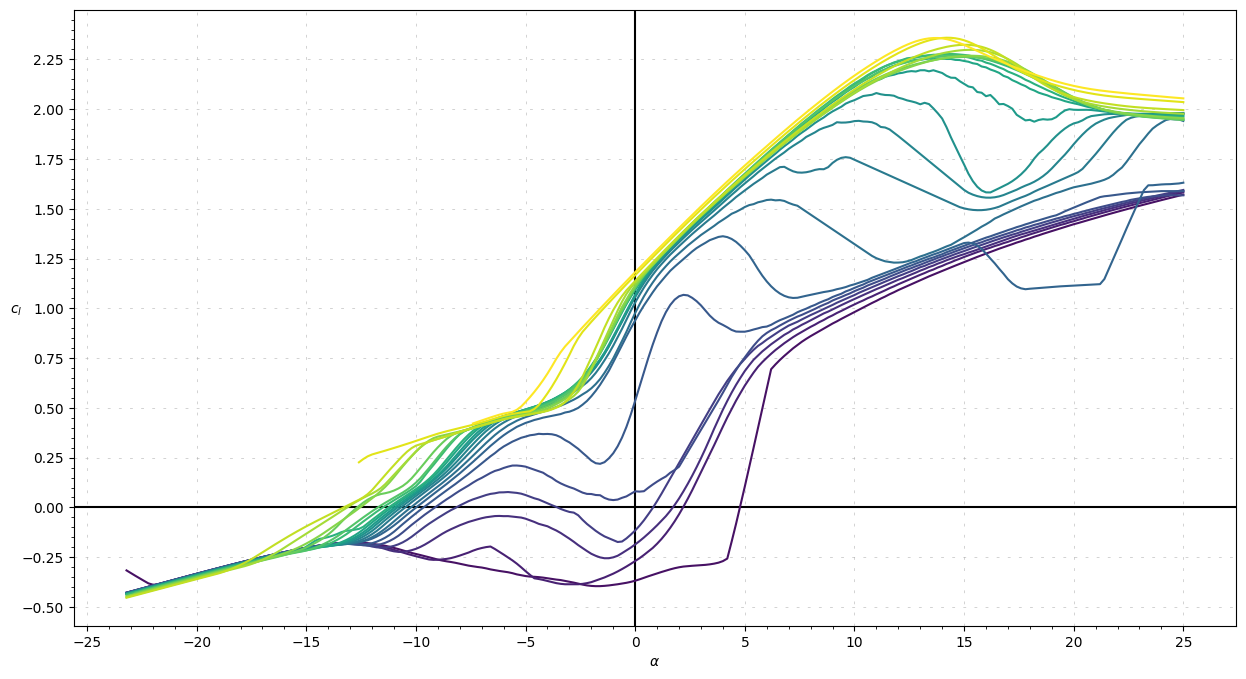

In [52]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("$c_l$",rotation=0)
ax.set_xlabel("$\\alpha$")
ax.axvline(color='black')
ax.axhline(color='black')
ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
ax.set_yticks(np.arange(-0.5,3,0.05),minor=True)
ax.set_yticks(np.arange(-0.5,3,0.25))
ax.set_xticks(alpha[0::5],minor=True)
ax.set_xticks(alpha[0::25])
for i,rey in enumerate(reynolds):
    ax.plot(alpha,cl[:,i],color=colormap.viridis((i+1)/(len(reynolds))))